# Data Preparation and Visualization

**1. Explore the data set canada.xlsx**

        a.share/A10_DataPreperationAndVisualization-master/DataVisualization/data/canada.xlsx 

**2. Write python code to visualize the following:**
        
        a. Find out the top 5 countries from Asia who have contributed maximum total immigration into Canada over the entire
           period of 1980  to 2013 - 10 marks 
        
        b. Plot the immigration trend from the above 5 countries over the years from 1980 thru 2013 - 10 marks 
        
        c. How will you show the relative contribution of each of above 5 countries as a fraction of total immigration from 
           all countries over each year from 1980 thru 2013 on the same plot ? - 10 marks 
    
**3. Please submit Jupyter notebook files with final answer code block clearly marked**

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Load UN Canadian Immigration Data
### The data is of yearly country wise immigration into Canada from around the globe between 1980 and 2013

In [2]:
# load data, skip the top 20 and bottom 2 rows as they do not contain relevant data
df_canada = pd.read_excel('canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20))

## See top 5 rows, datatypes of each column, unique value and count of each row

In [3]:
# top 5 rows
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# Schema Information
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 43 columns):
Type        197 non-null object
Coverage    197 non-null object
OdName      197 non-null object
AREA        197 non-null int64
AreaName    197 non-null object
REG         197 non-null int64
RegName     197 non-null object
DEV         197 non-null int64
DevName     197 non-null object
1980        197 non-null int64
1981        197 non-null int64
1982        197 non-null int64
1983        197 non-null int64
1984        197 non-null int64
1985        197 non-null int64
1986        197 non-null int64
1987        197 non-null int64
1988        197 non-null int64
1989        197 non-null int64
1990        197 non-null int64
1991        197 non-null int64
1992        197 non-null int64
1993        197 non-null int64
1994        197 non-null int64
1995        197 non-null int64
1996        197 non-null int64
1997        197 non-null int64
1998        197 non-null int64
1999        197 non-n

**Rename a few columns with more easily identifiable names and map years as string to a list**

In [5]:
# rename some columns to make better sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
# full range of the time series
years = list(map(str, range(1980, 2014)))

In [6]:
df_canada.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


**Make all columns a string irrespective of whether numeric or string**

In [7]:
df_canada.columns.tolist()
df_canada.columns = list(map(str, df_canada.columns))

In [8]:
df_canada.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Republic of the Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'North Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
      

**Comments: List of contries contains Unknown and Total.**

**Set Index to Country as each line of data refers to a country**

In [9]:
df_canada.set_index('Country', inplace=True)

In [10]:
df_canada.tail()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,...,124,161,140,122,133,128,211,160,174,217
Zambia,Immigrants,Foreigners,903,Africa,910,Eastern Africa,902,Developing regions,11,17,...,56,91,77,71,64,60,102,69,46,59
Zimbabwe,Immigrants,Foreigners,903,Africa,910,Eastern Africa,902,Developing regions,72,114,...,1450,615,454,663,611,508,494,434,437,407
Unknown,Immigrants,Foreigners,999,World,999,World,999,World,44000,18078,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
Total,Immigrants,Both,999,World,999,World,999,World,143137,128641,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


## Ensure appropriate datatypes for each column & there is no missing immigration data

**First 9 are categorical including AREA, REG, DEV, though they are numbers. 34 Year-wise immigration are numeric.**

In [11]:
df_canada[["AREA", 'REG', 'DEV']] = df_canada[["AREA", 'REG', 'DEV']].astype(str)

**Confirming there is no missing data in year-wise immigration - sum by year equal to Total (the last row)**

In [12]:
df_t = df_canada[years].iloc[:-1].sum(axis=0) - df_canada[years].iloc[-1]
df_t.sum()

0

**Add column for Total immigrations for each country during 1980-2013**

In [13]:
df_canada['Total'] = df_canada[years].sum(axis=1) 

**Run descriptive stats without the last row of dataframe which is Total immigration to Canada in a year**

In [14]:
# percentile list 
perc =[.20, .40, .60, .80]
df_canada.iloc[:-1].describe(percentiles = perc, include = 'all')

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,196,196,196,196,196,196,196,196,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
unique,1,2,7,7,23,23,3,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Immigrants,Foreigners,903,Africa,922,Western Asia,902,Developing regions,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,196,195,54,54,18,18,147,147,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730.290816,656.331633,...,1337.969388,1283.877551,1207.923469,1261.448980,1286.581633,1432.076531,1269.122449,1315.831633,1321.535714,35327.612245
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3664.971286,2484.869895,...,4421.525944,3923.791864,3442.092092,3691.110002,3822.816364,4454.546970,4020.795822,4236.731113,4227.087570,97814.332441
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
20%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,14.000000,12.000000,15.000000,18.000000,15.000000,25.000000,18.000000,25.000000,22.000000,550.000000
40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,...,122.000000,116.000000,110.000000,112.000000,119.000000,126.000000,123.000000,126.000000,119.000000,2852.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.500000,10.000000,...,210.500000,224.000000,198.000000,205.000000,215.500000,213.500000,187.500000,234.000000,215.000000,5442.000000


### Sort Countries on total immigrants to Canada

#### Sub-setting Asia out of all countries

In [15]:
df_canada_asia = df_canada[df_canada['Continent'].str.contains("Asia")==True]

**By raw immigration numbers. Last row (annual total) removed for sorting country-wise total over 1980-2013 period**

In [16]:
top_imm_countries_asia = df_canada_asia.iloc[:-1].sort_values(by='Total', ascending=False)

**By share of immigration of the countries for each year out of total immigration from all countries**

In [17]:
top_imm_countries_asia_share = top_imm_countries_asia[years] / df_canada[years].sum(axis=0)

**Converting share of immigration from float to %**

In [18]:
formatdict = {}
for y in years: formatdict[y] = "{:,.1%}"
top_imm_countries_asia_share.style.format(formatdict)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,3.1%,3.4%,3.4%,4.1%,3.2%,2.5%,3.6%,3.3%,3.6%,2.7%,2.8%,2.9%,2.7%,4.2%,4.1%,4.3%,5.3%,5.2%,4.9%,5.0%,6.3%,6.2%,7.0%,6.1%,6.0%,6.9%,6.7%,6.1%,5.7%,5.8%,6.1%,5.5%,6.0%,6.4%
China,1.8%,2.6%,1.4%,1.0%,0.9%,1.1%,1.0%,0.9%,0.9%,1.1%,1.9%,3.1%,2.1%,1.9%,2.9%,3.4%,4.3%,4.7%,6.0%,7.9%,7.8%,7.3%,7.0%,8.2%,7.8%,8.1%,6.7%,5.8%,6.1%,5.9%,5.4%,5.7%,6.4%,6.6%
Philippines,2.1%,2.3%,2.2%,2.6%,2.2%,1.9%,2.1%,2.4%,2.7%,3.1%,2.9%,2.7%,2.7%,4.0%,4.4%,3.7%,3.0%,2.7%,2.5%,2.6%,2.4%,2.8%,2.6%,2.9%,3.0%,3.5%,3.7%,4.2%,5.0%,5.7%,6.9%,7.4%,6.7%,5.7%
Pakistan,0.3%,0.4%,0.5%,0.5%,0.4%,0.3%,0.3%,0.4%,0.4%,0.6%,0.6%,0.7%,0.8%,0.9%,1.0%,1.2%,2.0%,3.0%,2.6%,2.6%,3.4%,3.3%,3.3%,3.0%,2.8%,2.7%,2.6%,2.1%,1.8%,1.4%,1.2%,1.5%,2.2%,2.4%
Iran,0.4%,0.6%,0.8%,0.9%,1.1%,1.0%,0.9%,1.0%,1.0%,1.0%,0.8%,1.3%,1.3%,0.8%,0.6%,0.9%,1.4%,1.8%,2.0%,1.6%,1.3%,1.2%,1.8%,1.3%,1.3%,1.1%,1.5%,1.5%,1.3%,1.3%,1.3%,1.5%,1.5%,2.2%
Sri Lanka,0.1%,0.1%,0.1%,0.1%,0.6%,0.5%,0.9%,1.5%,0.9%,0.7%,0.8%,1.6%,2.6%,1.9%,1.6%,2.2%,1.4%,1.3%,1.0%,1.3%,1.3%,1.2%,1.2%,1.1%,1.0%,0.9%,0.9%,0.9%,1.0%,0.9%,0.8%,0.7%,0.6%,0.5%
South Korea,0.4%,0.6%,0.6%,0.6%,0.5%,0.6%,0.6%,0.8%,0.9%,0.8%,0.5%,0.6%,0.7%,0.7%,0.7%,0.8%,0.7%,0.9%,1.4%,1.9%,1.7%,1.9%,1.6%,1.6%,1.1%,1.1%,1.2%,1.3%,1.5%,1.2%,1.0%,0.9%,1.0%,0.9%
Lebanon,0.5%,0.4%,0.5%,0.4%,0.7%,1.0%,1.3%,1.3%,1.2%,1.9%,3.1%,2.7%,1.4%,1.0%,0.6%,0.5%,0.4%,0.3%,0.4%,0.4%,0.4%,0.5%,0.5%,0.7%,0.7%,0.7%,0.8%,0.7%,0.7%,0.6%,0.6%,0.6%,0.3%,0.4%
Vietnam,0.4%,0.7%,0.9%,1.9%,4.3%,3.5%,1.4%,0.5%,0.4%,0.8%,0.9%,1.3%,1.1%,1.3%,1.1%,0.9%,0.5%,0.4%,0.5%,0.4%,0.4%,0.4%,0.5%,0.4%,0.4%,0.4%,0.6%,0.5%,0.4%,0.4%,0.3%,0.3%,0.3%,0.4%


### Top 5 countries immigrating to Canada during 1980-2013

2. Write python code to visualize the following: 
        
        a. Find out the top 5 countries from Asia who have contributed maximum total immigration into Canada over the entire period of 1980  to 2013 - 10 marks 


In [19]:
top_imm_countries_asia[['Total']].iloc[:5].index.tolist()

['India', 'China', 'Philippines', 'Pakistan', 'Iran']

**Creating nd-array of 34 years of immigration data for the top 5 countries. These 2 arrays will be used for plotting**
    1. raw numbers 
    2. share of total annual immigration

In [20]:
y_axis = []
y_axis.append(top_imm_countries_asia.iloc[:5][years].values)
y_axis.append(top_imm_countries_asia_share.iloc[:5].values)

### Plot of Immigration Trend
2. Write python code to visualize the following: 
        
        b. Plot the immigration trend from the above 5 countries over the years from 1980 thru 2013 - 10 marks

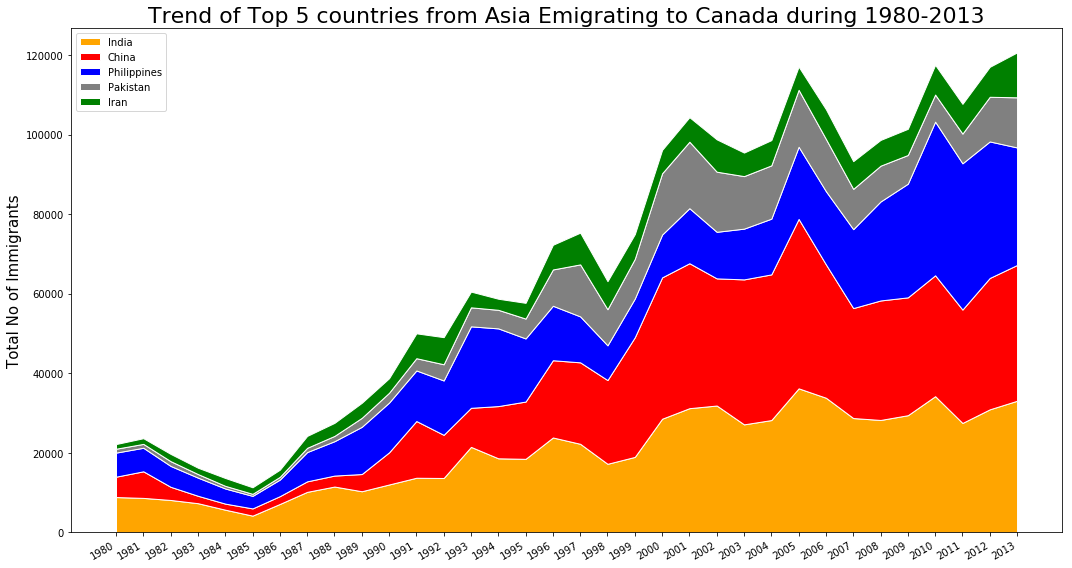

In [21]:
labels = top_imm_countries_asia[['Total']].iloc[:5].index.tolist()
colors = ['orange','red','blue', 'grey', 'green']
fig, ax = plt.subplots(figsize=(15, 8))
ax.stackplot(years, y_axis[0], labels=labels, colors = colors, edgecolor='white')
ax.set_title('Trend of Top 5 countries from Asia Emigrating to Canada during 1980-2013', fontsize=22)
ax.legend(loc='upper left', fontsize=10)
ax.set_ylabel('Total No of Immigrants', fontsize=15)
fig.autofmt_xdate()
fig.tight_layout()

### Plot of Immigration Trend 
2. Write python code to visualize the following: 
        
        c. How will you show the relative contribution of each of above 5 countries as a fraction of total immigration from 
           all countries over each year from 1980 thru 2013 on the same plot ? - 10 marks 


### Create 2 subplots of trend in absolute numbers and in terms of Share over time from top 5 countries

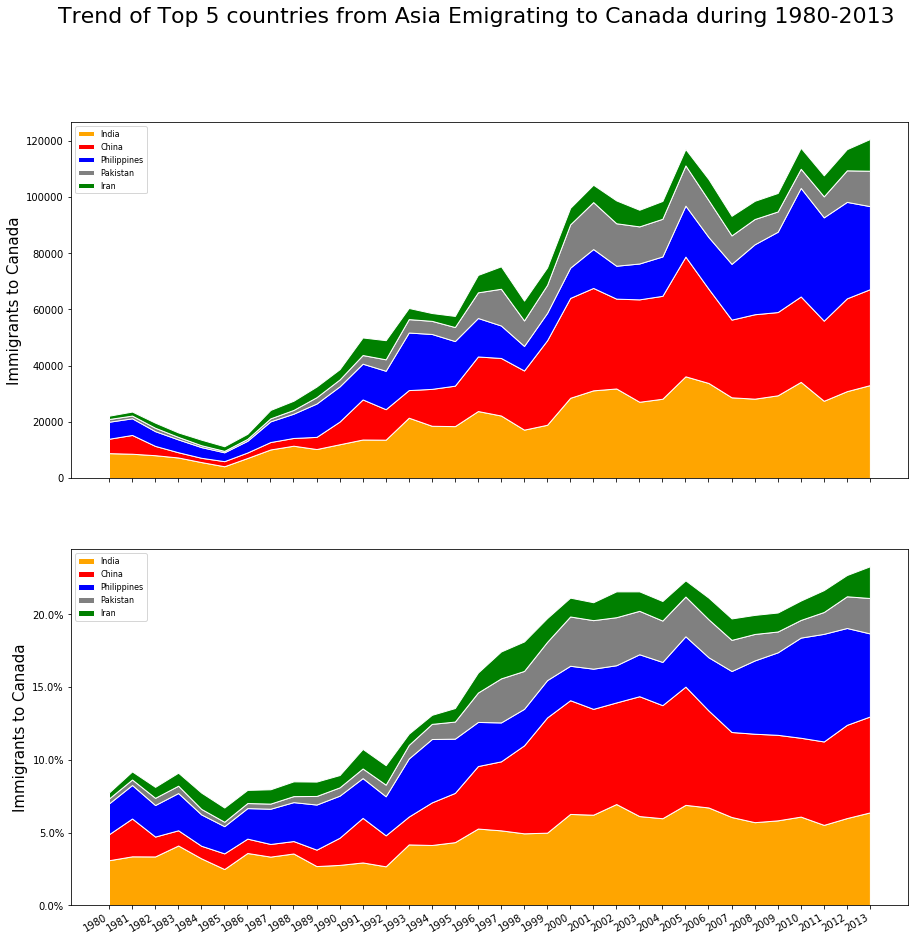

In [22]:
fig, axes = plt.subplots(
    nrows = 2, ncols = 1, # two plots one top of each other
    sharex = True, sharey = False, # shared common ranges x axis
    figsize=(15, 16)
    )

# super title
fig.suptitle('Trend of Top 5 countries from Asia Emigrating to Canada during 1980-2013', fontsize=22)
# fig.tight_layout()

for i in range(2):
    ax = axes[i] # pick each axis
    ax.stackplot(years, y_axis[i],labels=labels, colors = colors, edgecolor='white') # plot
    ax.legend(loc='upper left', fontsize=8)
    ax.set_ylabel('Immigrants to Canada', fontsize=15)
    vals = ax.get_yticks()
    # To get % as y-axis label for Share of immigration from top 5 countries
    if vals[1] < 1:
        ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    fig.autofmt_xdate()
